<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Datasets

In [ ]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', sep='\s+', names=cols)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#Co-realation b/w data

In [ ]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

<Axes: >

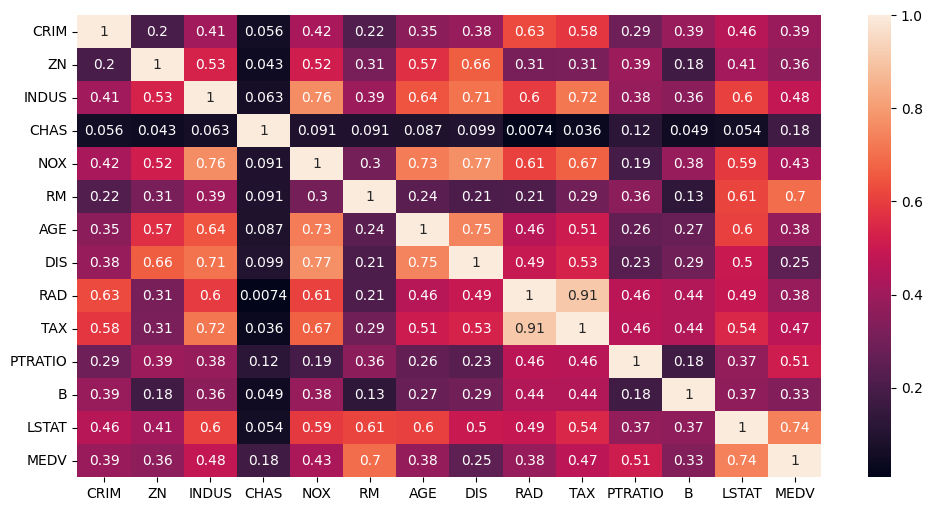

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr().abs(), annot=True)

#Data Normalization

In [ ]:
df_one = df[['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]
df_one.head()

,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,1,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,2,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,2,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,3,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,3,222.0,18.7,5.33,36.2


In [ ]:
x = df_one[df_one.columns[:-1]].values
y = df_one[df_one.columns[-1]].values

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
Df = pd.DataFrame(data, columns=df_one.columns)

#Data Visualiation

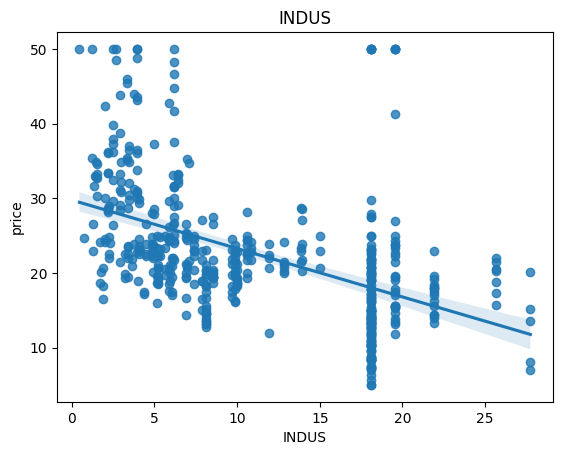

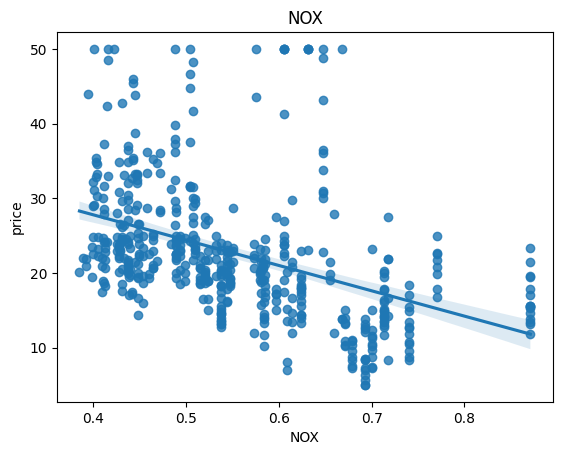

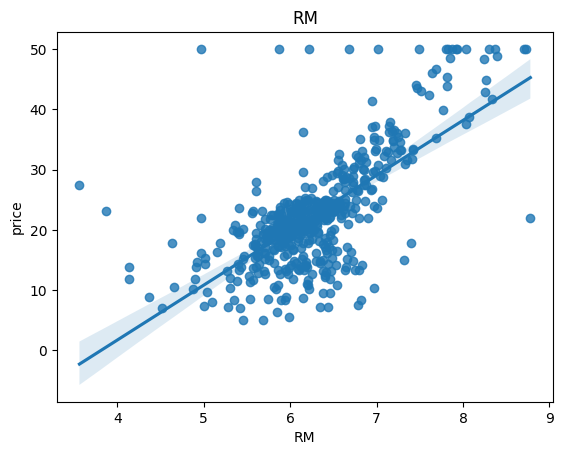

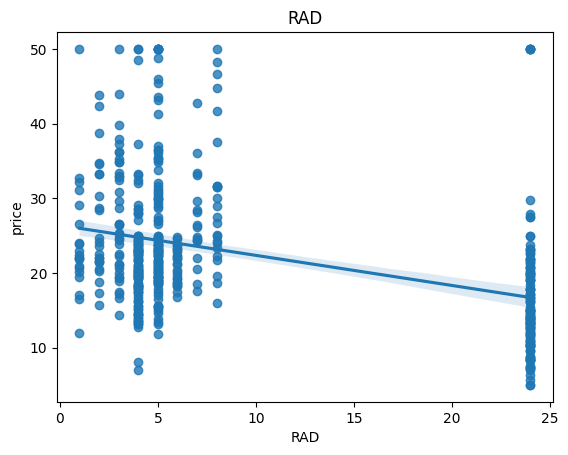

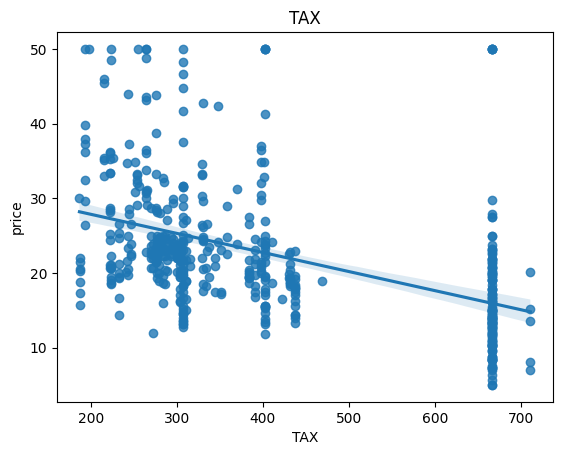

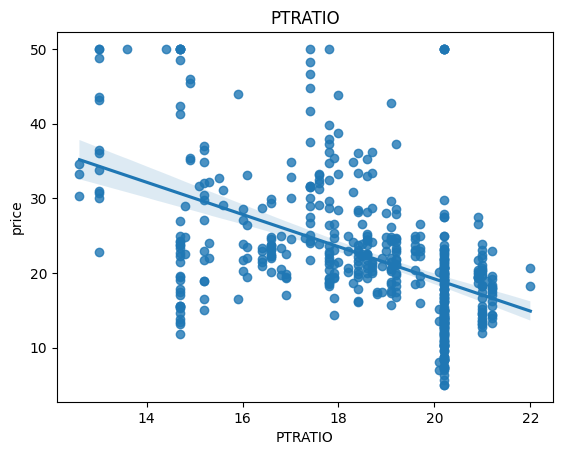

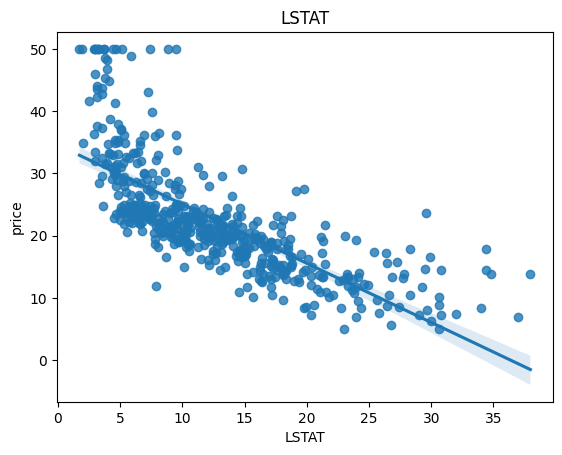

In [ ]:
for column in df_one.columns[:-1]:
  sns.regplot(x=df_one[column], y=y, data=df_one)
  plt.title(column)
  plt.xlabel(column)
  plt.ylabel('price')
  plt.show()

#Train/Valid/Testing datasets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(x_test)

In [ ]:
score = r2_score(y_test, y_pred)
score

0.6887898924720866

#KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_model.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.7914211819282229

#SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm_model = SVR()
svm_model.fit(x_train, y_train)

SVR()

In [ ]:
y_pred = svm_model.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.7083636063018274